# Advance Visualization

In [1]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from folium import plugins
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [2]:
df_canada = pd.read_excel("data/Canada.xlsx", sheet_name="Canada by Citizenship",
                          skiprows=range(20), skipfooter=2)
df_canada = df_canada.iloc[:, :-8]
df_canada.drop(columns=["Type", "Coverage", "AREA", "REG", "DEV"], inplace=True)
df_canada.rename(columns={"OdName": "Country", "AreaName": "Area", "RegName": "Region"}, inplace=True)
df_canada["Total"] = df_canada.sum(axis=1)
df_canada

,Country,Area,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


In [3]:
with open("data/alice_novel.txt", "r") as f:
    alice_novel = f.read()

print(alice_novel[:500])

﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: E


In [4]:
alice_wc = WordCloud(
    stopwords=STOPWORDS,
    background_color="white",
    max_words=2000
)

alice_wc.generate(alice_novel)

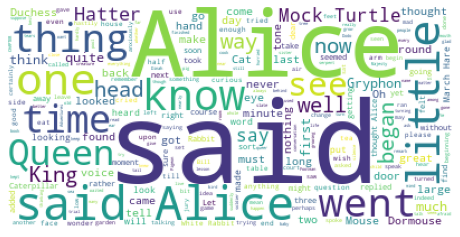

In [5]:
plt.figure(figsize=(8, 5))
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

In [6]:
STOPWORDS.add("must")
STOPWORDS.add("said")
STOPWORDS.add("much")

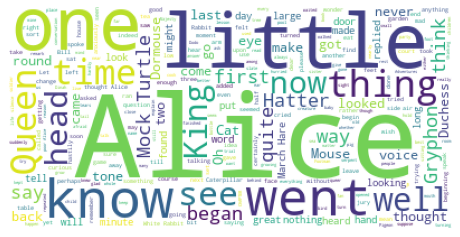

In [7]:
alice_wc.generate(alice_novel)
plt.figure(figsize=(8, 5))
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

In [8]:
img = Image.open("data/alice_mask.png")
alice_mask = np.array(img)
print(alice_mask, alice_mask.shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] (900, 900)


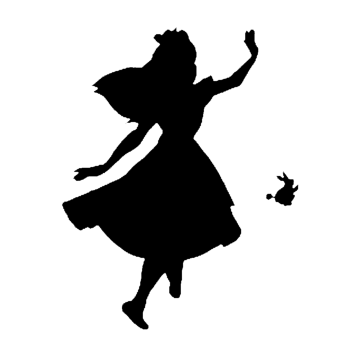

In [9]:
plt.figure(figsize=(6, 10))
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [10]:
alice_wc = WordCloud(
    stopwords=STOPWORDS,
    background_color="white",
    max_words=2000,
    mask=alice_mask
)
alice_wc.generate(alice_novel)

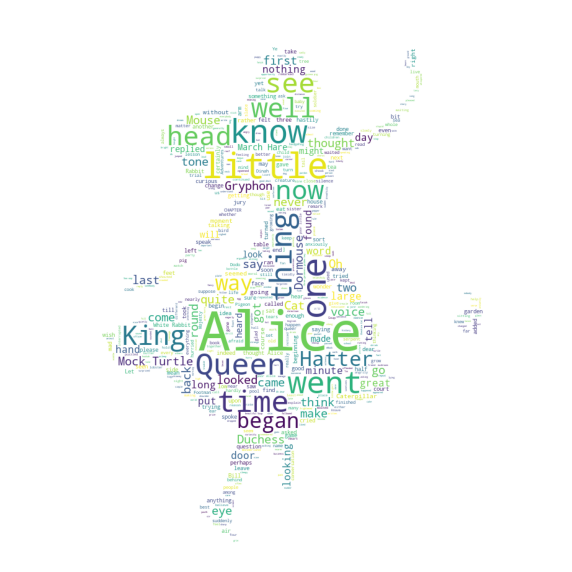

In [11]:
plt.figure(figsize=(10, 14))
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

In [12]:
int(90 * (df_canada[df_canada.Country == "China"]["Total"] / df_canada.Total.sum()))

9

In [13]:
max_words = 1000
text = ""

for country in df_canada.Country:
    if len(country.split(" ")) == 1:
        repeat_country = int(
            max_words*df_canada.loc[df_canada.Country == country, "Total"] / float(df_canada.Total.sum())
        )
        text = text + ((country + " ") * repeat_country)

print(text)

Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Albania Albania Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Argentina Argentina Argentina Australia Australia Australia Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Barbados Belarus Belgium Brazil Brazil Brazil Brazil Bulgaria Bulgaria Bulgaria Burundi Cambodia Cameroon Cameroon Chile Chile Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China C

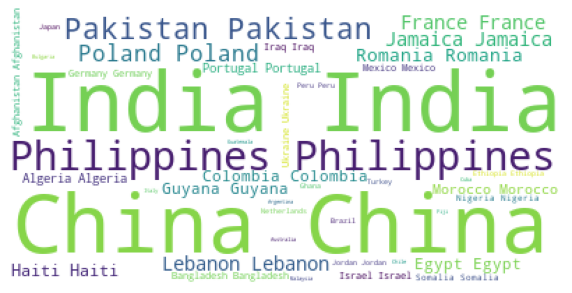

In [14]:
canada_wc = WordCloud(background_color="white")
canada_wc.generate(text)

plt.figure(figsize=(10, 14))
plt.imshow(canada_wc)
plt.axis("off")
plt.show()

In [15]:
years = list(range(1980, 2014))
df_total = pd.DataFrame(df_canada[years].sum(axis=0))
df_total.index = years
df_total.reset_index(inplace=True)
df_total.columns = ["Years", "Total"]

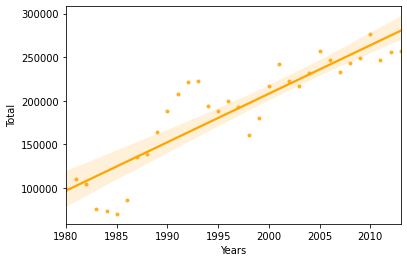

In [16]:
sns.regplot(x="Years", y="Total", data=df_total, color="orange", marker=".")
plt.show()

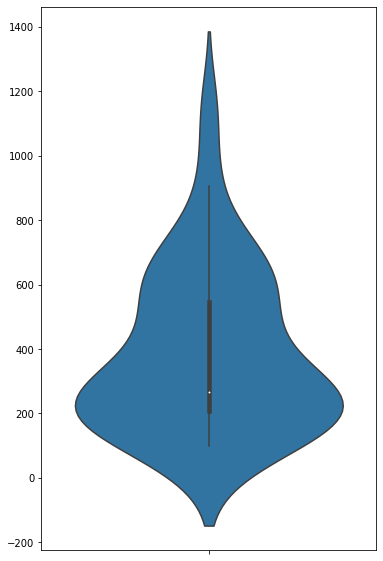

In [17]:
plt.figure(figsize=(6, 10))
sns.violinplot(y=df_canada.loc[df_canada.Country == "Indonesia", years].values)
plt.show()

In [18]:
data_seaborn = sns.load_dataset("tips")

In [19]:
data_seaborn

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


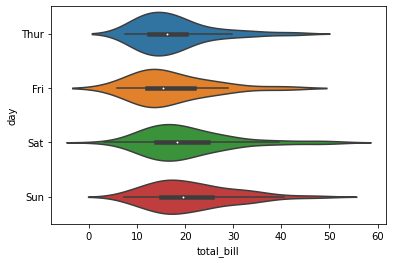

In [20]:
sns.violinplot(x="total_bill", y="day", data=data_seaborn)
plt.show()

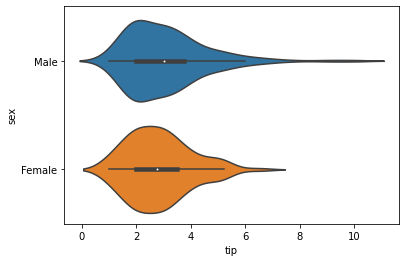

In [21]:
sns.violinplot(x="tip", y="sex", data=data_seaborn)
plt.show()

In [22]:
folium.__version__

'0.11.0'

In [23]:
world_map = folium.Map()
world_map

In [24]:
hacktiv8_map = folium.Map(location=[-6.259758863560389, 106.78170203053368], zoom_start=15, tiles="Stamen Toner")
hacktiv8_map

In [25]:
hacktiv8_map = folium.Map(location=[-6.259758863560389, 106.78170203053368], zoom_start=15, tiles="Stamen Terrain")
hacktiv8_map

In [26]:
df_incidents = pd.read_csv("data/incidents.csv")
df_incidents

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200583e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200583e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410593e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600137e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600027e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,160299527,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,04/11/2016 12:00:00 AM,19:00,TARAVAL,NONE,37TH AV / RIVERA ST,-122.495239,37.745926,"(37.7459261200082, -122.495238510582)",1.602995e+13
10033,160299561,NON-CRIMINAL,"AIDED CASE, INJURED PERSON",Tuesday,04/12/2016 12:00:00 AM,00:19,INGLESIDE,NONE,0 Block of 30TH ST,-122.422634,37.742279,"(37.7422794284678, -122.422634459462)",1.602996e+13
10034,160299577,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,04/12/2016 12:00:00 AM,00:40,TARAVAL,"ARREST, BOOKED",19TH AV / KIRKHAM ST,-122.476814,37.759834,"(37.7598341069365, -122.476813745288)",1.602996e+13
10035,160299624,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Tuesday,04/12/2016 12:00:00 AM,01:12,BAYVIEW,"ARREST, BOOKED",1000 Block of CONNECTICUT ST,-122.397089,37.753599,"(37.7535987880327, -122.397089183868)",1.602996e+13


In [27]:
sample_incidents = df_incidents.sample(n=100, random_state=11)
sample_incidents

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
1507,160075606,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,01/26/2016 12:00:00 AM,20:08,SOUTHERN,NONE,100 Block of 7TH ST,-122.410718,37.778960,"(37.7789597633583, -122.410718060304)",1.600756e+13
8293,160272341,ROBBERY,"ROBBERY, BODILY FORCE",Saturday,04/02/2016 12:00:00 AM,16:52,CENTRAL,NONE,500 Block of BEACH ST,-122.418089,37.806912,"(37.8069115312916, -122.418089185425)",1.602723e+13
1455,160081114,NON-CRIMINAL,LOST PROPERTY,Thursday,01/28/2016 12:00:00 AM,02:00,CENTRAL,NONE,1200 Block of GRANT AV,-122.407110,37.798646,"(37.7986457830055, -122.407110077805)",1.600811e+13
5323,160220099,OTHER OFFENSES,RESISTING ARREST,Wednesday,03/16/2016 12:00:00 AM,01:45,INGLESIDE,"ARREST, BOOKED",3300 Block of MISSION ST,-122.421644,37.742997,"(37.7429970144076, -122.421644478447)",1.602201e+13
8723,160840631,ASSAULT,STALKING,Saturday,10/15/2016 12:00:00 AM,10:45,BAYVIEW,NONE,4600 Block of 3RD ST,-122.390412,37.736010,"(37.7360102192532, -122.390412132668)",1.608406e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5722,160227681,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Tuesday,03/08/2016 12:00:00 AM,12:37,SOUTHERN,"ARREST, BOOKED",800 Block of MARKET ST,-122.406521,37.785063,"(37.7850629421661, -122.406520987144)",1.602277e+13
431,160296272,LARCENY/THEFT,GRAND THEFT FROM PERSON,Sunday,04/10/2016 12:00:00 AM,21:40,TENDERLOIN,NONE,200 Block of JONES ST,-122.412574,37.783469,"(37.7834687204586, -122.412573643201)",1.602963e+13
1091,160069483,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,01/24/2016 12:00:00 AM,17:00,BAYVIEW,NONE,22ND ST / ILLINOIS ST,-122.387316,37.758002,"(37.7580021664589, -122.387316279433)",1.600695e+13
8596,160277363,MISSING PERSON,MISSING ADULT,Monday,04/04/2016 12:00:00 AM,03:00,PARK,NONE,400 Block of BAKER ST,-122.441275,37.775036,"(37.7750363632073, -122.441275381343)",1.602774e+13


In [28]:
latitude = 37.77
longitude = -122.42

sf_map = folium.Map(location=(latitude, longitude), zoom_start=12)
sf_map

In [29]:
incidents = folium.map.FeatureGroup()

for lat, lng in zip(sample_incidents.Y, sample_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color="yellow",
            fill=True,
            fill_color="blue",
            fill_opacity=.7
        )
    )

for lat, lng, label in zip(sample_incidents.Y, sample_incidents.X, sample_incidents.Category):
    folium.Marker((lat, lng), popup=label).add_to(sf_map)

sf_map.add_child(incidents)

In [30]:
sf_map = folium.Map(location=(latitude, longitude), zoom_start=12)
incidents = plugins.MarkerCluster().add_to(sf_map)

for lat, lng, label in zip(sample_incidents.Y, sample_incidents.X, sample_incidents.Category):
    folium.Marker(
        (lat, lng),
        popup=label,
        icon=None,
    ).add_to(incidents)

sf_map

In [31]:
sf_map = folium.Map(location=(latitude, longitude), zoom_start=12)
incidents = plugins.MarkerCluster().add_to(sf_map)

for lat, lng, label in zip(sample_incidents.Y, sample_incidents.X, sample_incidents.Category):
    folium.Marker(
        (lat, lng),
        popup=label,
        icon=None,
    ).add_to(incidents)

sf_map